<a href="https://colab.research.google.com/github/LatiefDataVisionary/bisa-ai-datamining-capstone-fraud-detection/blob/main/notebooks/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imbalanced Credit Card Fraud Detection: A Comparative Analysis of SVM, Naïve Bayes, and K-NN**

**Course:** Introduction to Data Mining (BISA AI Academy Capstone Project)

**Author:** Lathif Ramadhan [Github Profile](https://github.com/LatiefDataVisionary)

**Dataset:** [Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

The dataset used in this project is the "Credit Card Fraud Detection" dataset from Kaggle, sourced from a research collaboration by Worldline and the Machine Learning Group of ULB.

**Project Objectives:**

*   Perform in-depth Exploratory Data Analysis (EDA) to understand data characteristics.
*   Conduct data pre-processing, including feature scaling.
*   Address the main challenge: the highly **imbalanced class** distribution.
*   Build, train, and compare three classification models: Support Vector Machine (SVM), Naïve Bayes, and K-Nearest Neighbors (K-NN).
*   Evaluate models using relevant metrics for imbalanced data (such as AUPRC, F1-Score, and Recall).

**Key Libraries:** pandas, numpy, matplotlib, seaborn, scikit-learn, and imbalanced-learn.

## **1. Project Initialization**


### **1.1. Library Import**

In this section, we will import all the necessary Python libraries for data manipulation, analysis, visualization, and machine learning.


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, average_precision_score, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay

### **1.2. Data Loading**

We will load the `creditcard.csv` dataset from Google Drive into a pandas DataFrame.



In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
file_path = '/content/drive/MyDrive/Dataset/creditcard.csv'

df = pd.read_csv(file_path)
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### **1.3. Global Configurations**

Setting up global styles for plots to ensure consistency throughout the notebook.

In [75]:
# Set global plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style('whitegrid')

# Set global font size for better readability
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 14

print("Global plot configurations set.")

Global plot configurations set.


## **2. Exploratory Data Analysis (EDA) & Data Understanding**



### **2.1. Initial Data Inspection**

Get a first look at the data's dimensions, data types, and statistical summary using `.head()`, `.info()`, and `.describe()`.



In [76]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### **2.2. Data Quality Assessment**

Check for potential issues like missing values and duplicate records that could affect model performance.



In [78]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [79]:
df.duplicated().sum()

np.int64(1081)

### **2.3. Target Variable Analysis (Class Distribution)**

Critically analyze the distribution of the `Class` variable to understand the severity of the **class imbalance**, using both value counts and visualization.



In [80]:
# Calculate value counts and percentages
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

# Create a table (DataFrame) for counts and percentages
class_distribution_table = pd.DataFrame({
    'Count': class_counts,
    'Percentage': round(class_percentages, 2)
}).rename(index={0: 'Non-Fraud', 1: 'Fraud'})

print("Class Distribution Table:")
display(class_distribution_table)

Class Distribution Table:


,Count,Percentage
Class,,
Non-Fraud,284315,99.83
Fraud,492,0.17


/tmp/ipython-input-2028344894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


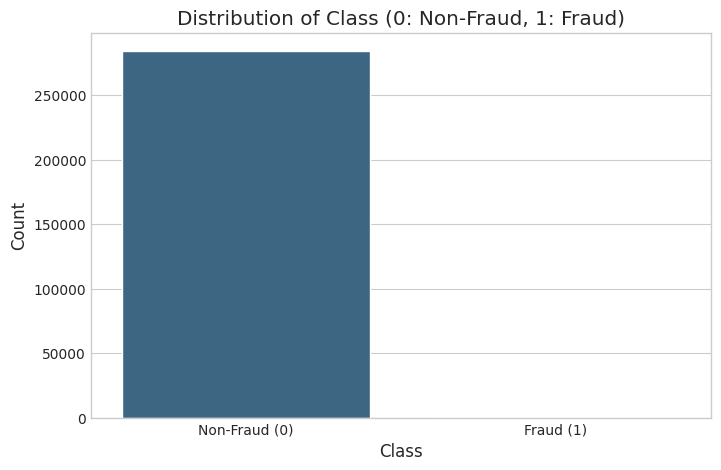

In [81]:
# Visualize the class distribution with a bar chart
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Distribution of Class (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

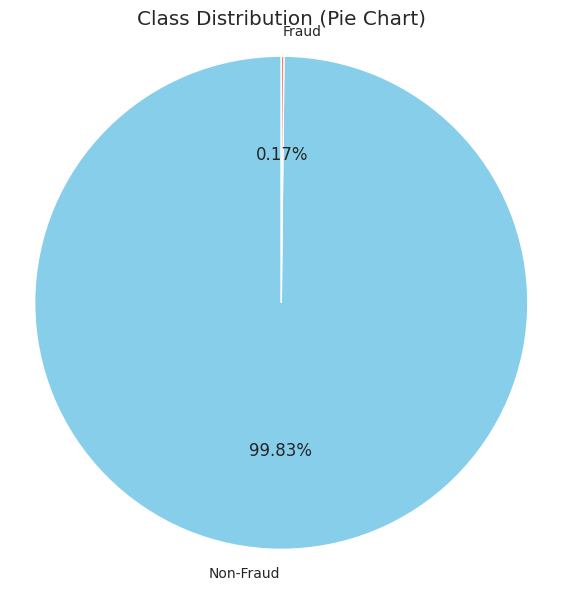

In [82]:
# Visualize the class distribution with a pie chart
plt.figure(figsize=(7, 7))
plt.pie(class_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.2f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Class Distribution (Pie Chart)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### **2.4. Feature Analysis: Time and Amount**

Analyze the distributions of the original, non-anonymized features (`Time` and `Amount`) and compare them across genuine and fraudulent transaction classes.



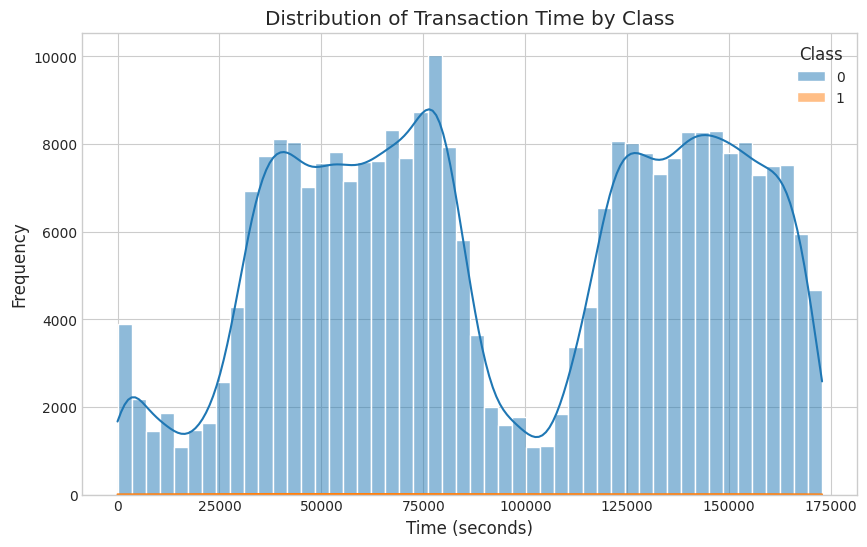

In [83]:
# Analyze the distribution of 'Time' for both classes
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Time', hue='Class', bins=50, kde=True)
plt.title('Distribution of Transaction Time by Class')
plt.xlabel('Time (seconds)') # Modified label for clarity
plt.ylabel('Frequency')
plt.show()

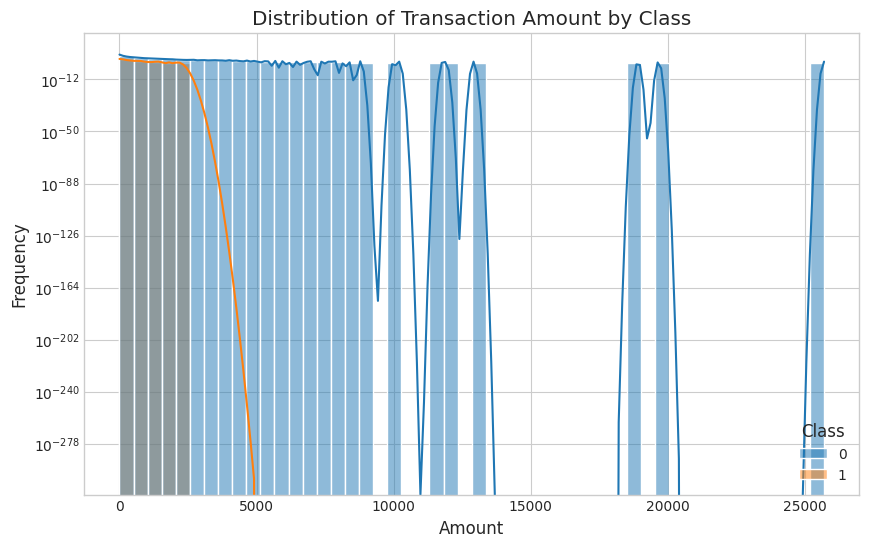

In [84]:
# Analyze the distribution of 'Amount' for both classes
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', hue='Class', bins=50, kde=True)
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log') # Use log scale due to large range of amounts
plt.show()

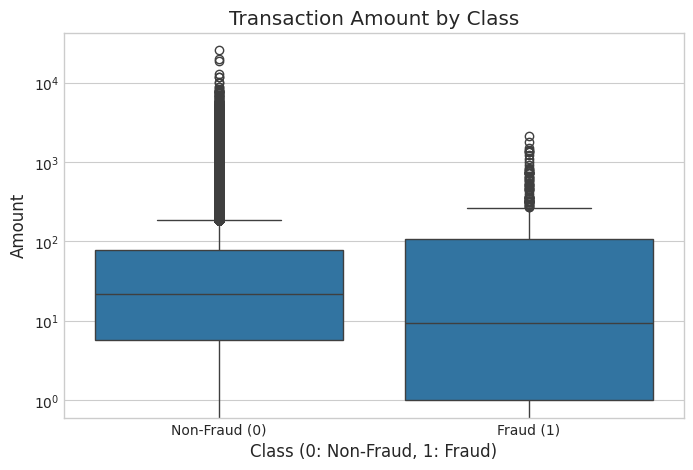

In [85]:
# Box plots for Amount by Class to better see the difference in medians and quartiles
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.yscale('log') # Use log scale due to outliers
plt.show()

### **2.5. Correlation Analysis**

Visualize a correlation matrix heatmap to identify relationships between features, which can provide insights for modeling.

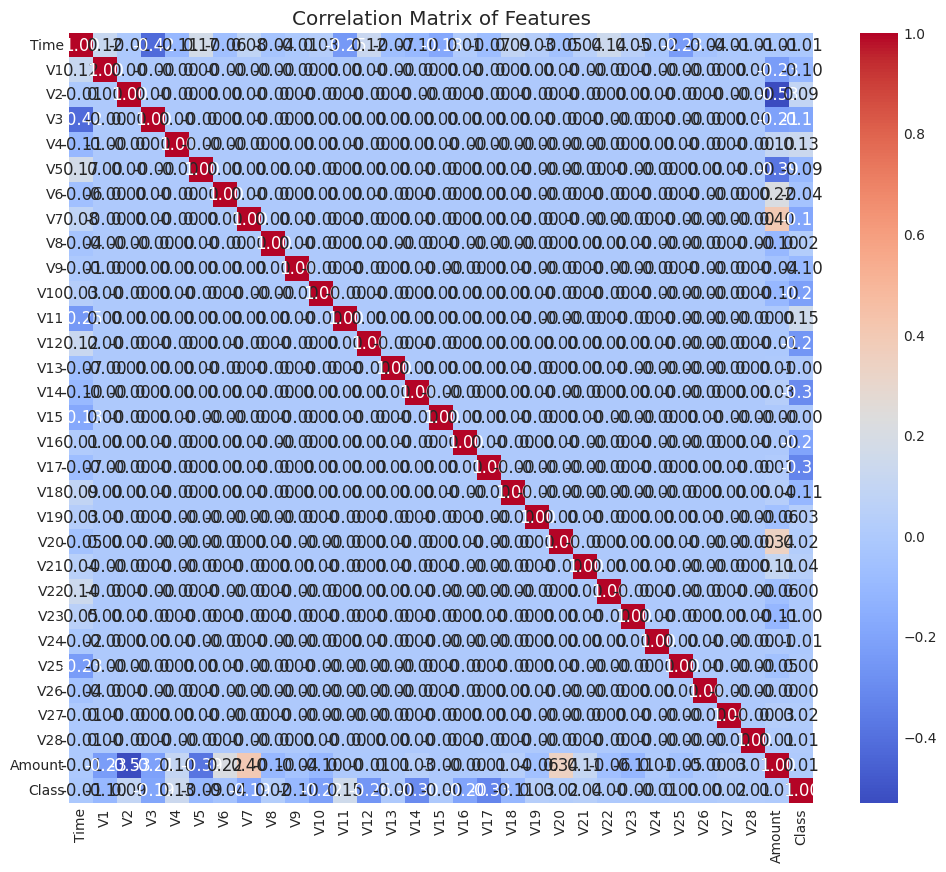

In [86]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f") # Set annot=True and fmt for showing values
plt.title('Correlation Matrix of Features')
plt.show()

/tmp/ipython-input-908331912.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='vlag')


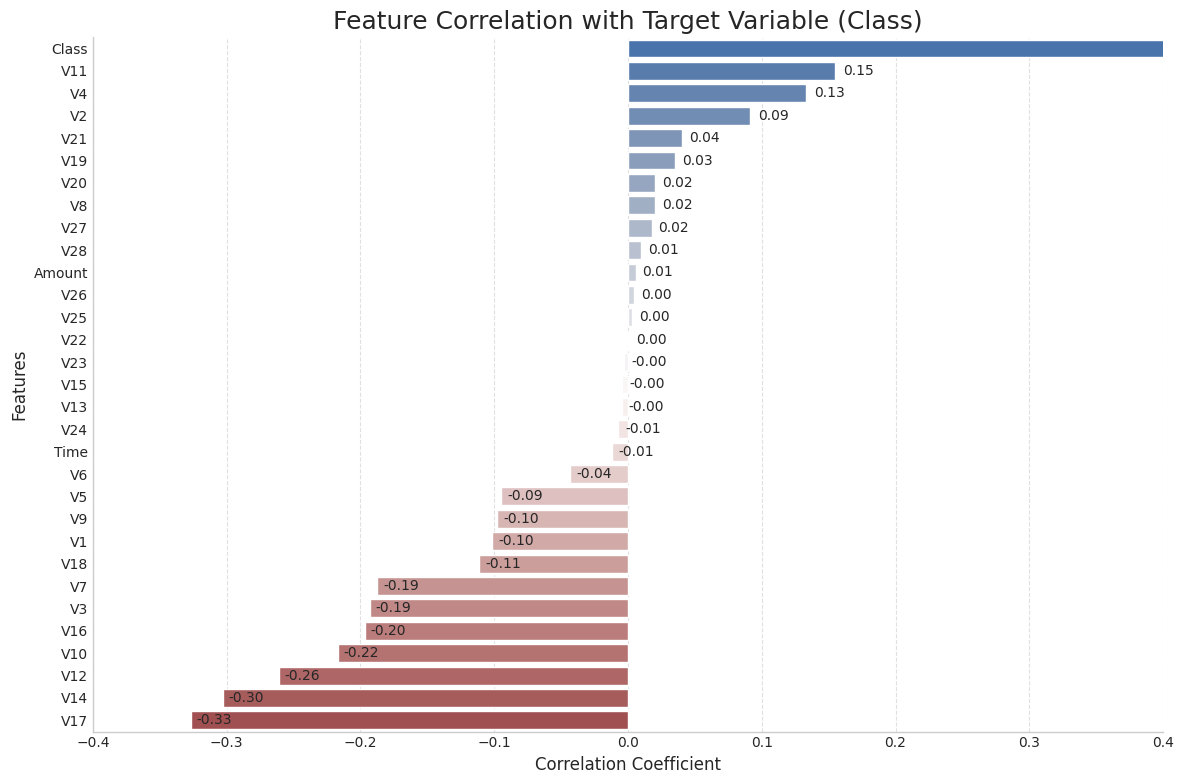

In [87]:
# --- Solution 1: Bar Plot of Correlation with Target 'Class'

# Calculate correlation with the 'Class' column only
corr_with_target = df.corr()['Class'].sort_values(ascending=False)

# Prepare the plot
plt.figure(figsize=(12, 8))

# Create a bar plot with Seaborn for a more appealing look
ax = sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='vlag')

# Add professional title and labels
plt.title('Feature Correlation with Target Variable (Class)', fontsize=18)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add correlation values at the end of each bar for clarity
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width() * 1.005, p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points', fontsize=10)

# Adjust plot limits to make space for annotations
plt.xlim(-0.4, 0.4) # Adjust limits as needed
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine() # Remove top and right borders
plt.tight_layout()
plt.show()

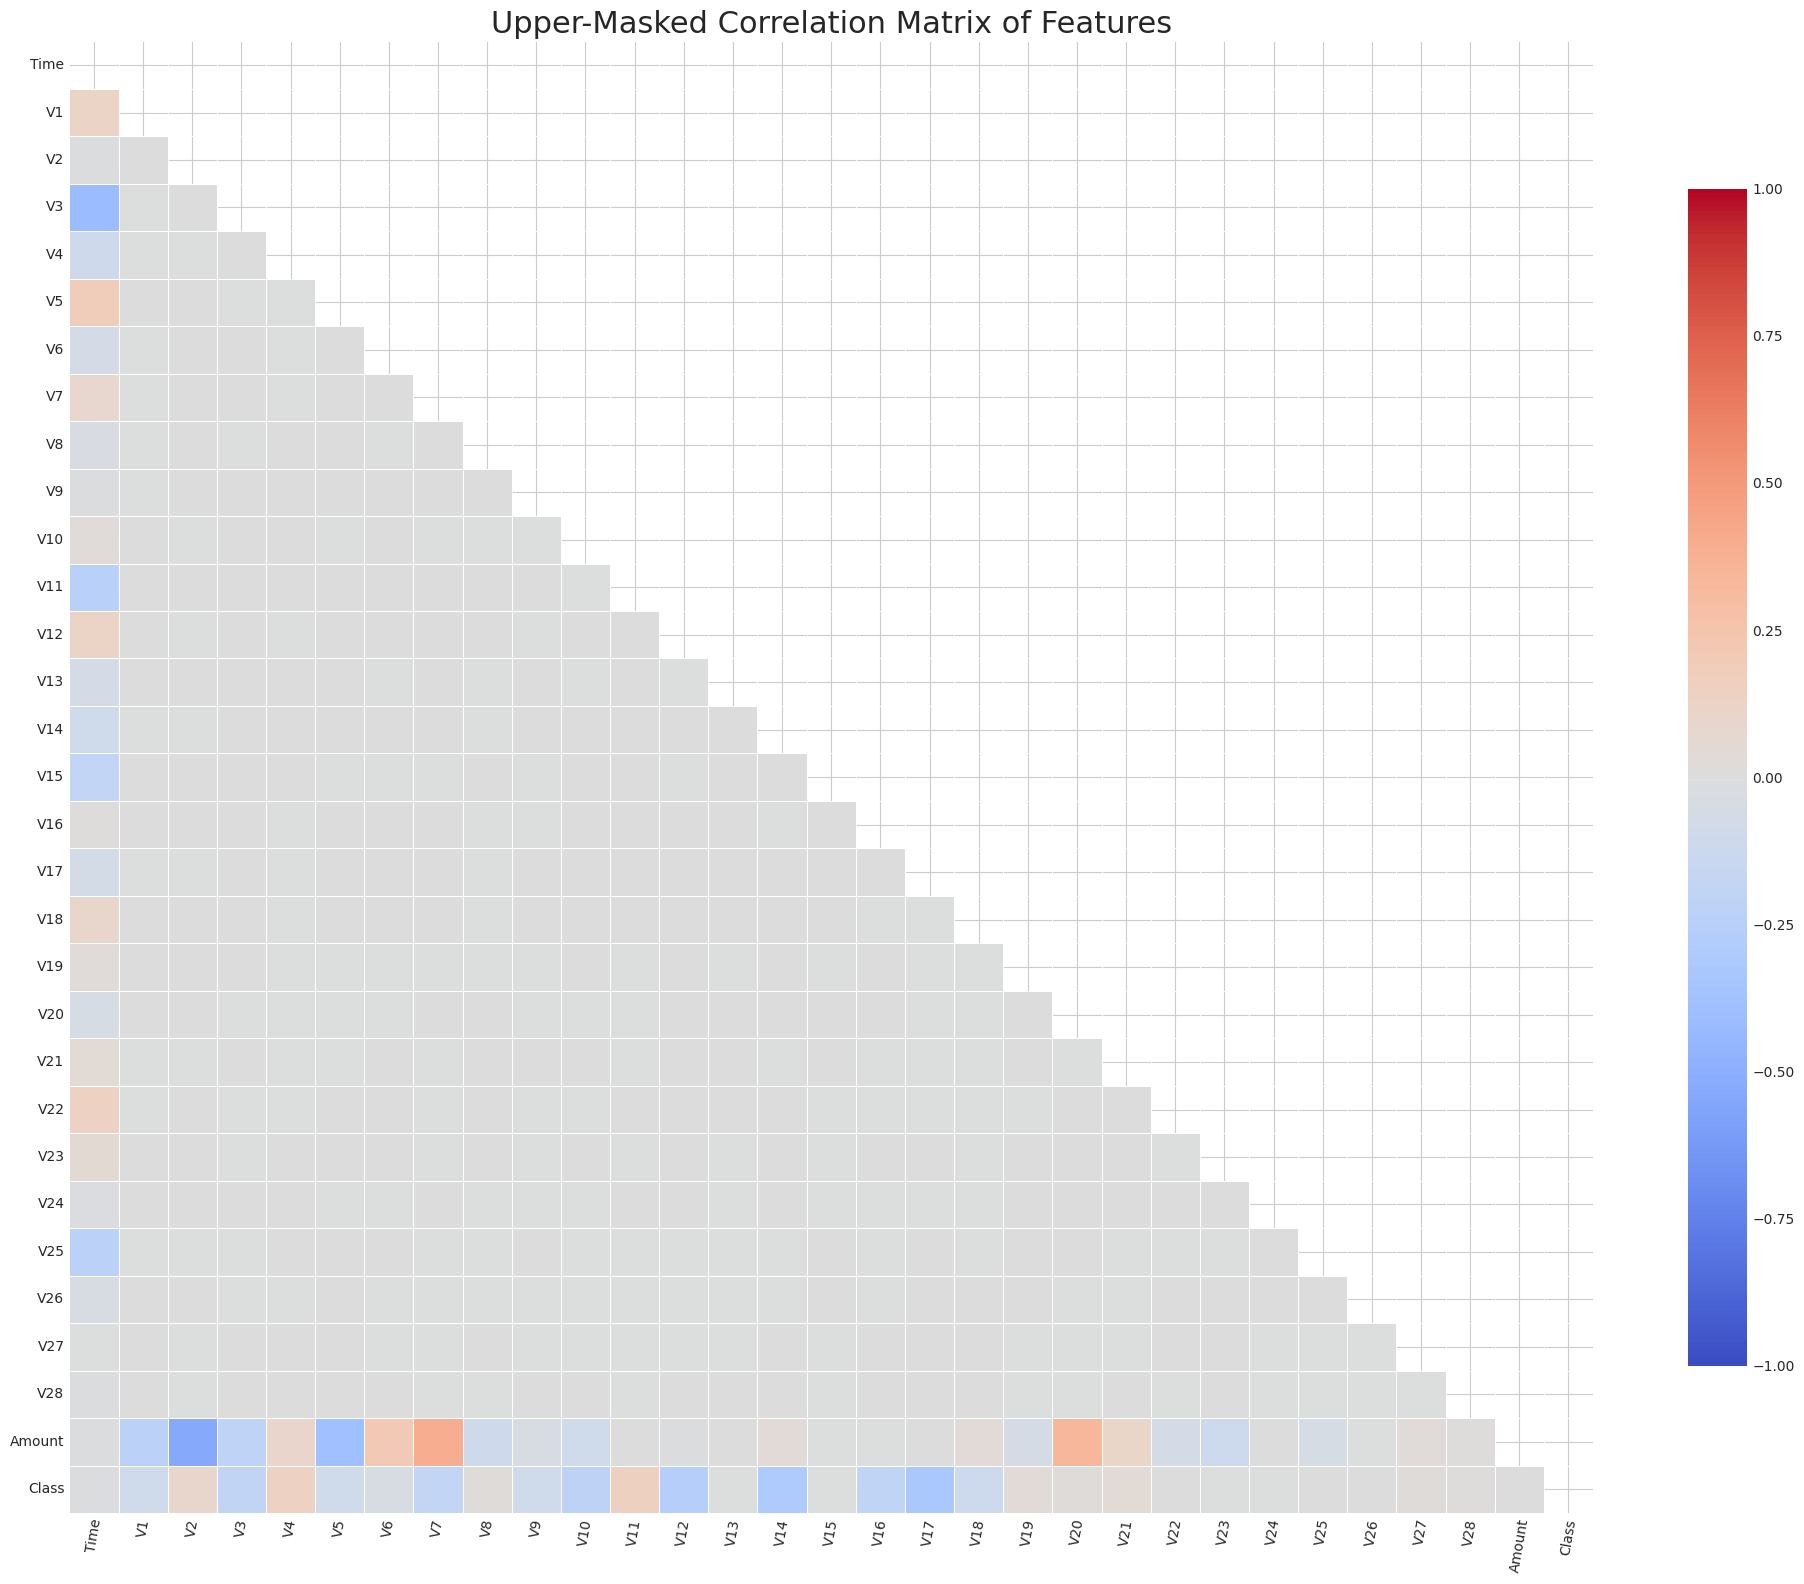

In [88]:
# --- Solution 2: Professional Heatmap with Mask

# Calculate the correlation matrix (same as before)
correlation_matrix = df.corr()

# Create a 'mask' to hide the upper-right triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Prepare the plot canvas
plt.figure(figsize=(20, 16))

# Create an enhanced heatmap
sns.heatmap(
    correlation_matrix,
    mask=mask,              # Apply the mask here
    cmap='coolwarm',        # Same colormap for consistency
    vmax=1.0,               # Set max limit for colorbar
    vmin=-1.0,              # Set min limit for colorbar
    linewidths=.5,          # Add thin lines between cells
    cbar_kws={"shrink": .8} # Slightly shrink the colorbar
)

# Add a descriptive title
plt.title('Upper-Masked Correlation Matrix of Features', fontsize=22)
plt.xticks(rotation=80) # Rotate labels
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## **3. Data Pre-processing**



### **3.1. Handling Duplicates**

Remove the identified duplicate records from the dataset.



In [89]:
# Remove duplicate rows
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after_dropping = df.shape[0]

print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after dropping duplicates: {rows_after_dropping}")
print(f"Number of duplicate rows removed: {initial_rows - rows_after_dropping}")

Initial number of rows: 284807
Number of rows after dropping duplicates: 283726
Number of duplicate rows removed: 1081


### **3.2. Feature Scaling**

Apply `StandardScaler` to the `Time` and `Amount` columns to normalize their scale, a crucial step for distance-based algorithms.



In [90]:
# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to 'Time' and 'Amount' columns
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

print("Feature scaling applied to 'Time' and 'Amount' columns.")

Feature scaling applied to 'Time' and 'Amount' columns.


### **3.3. Splitting the Data into Training and Testing Sets**

Partition the dataset into features (`X`) and target (`y`), then split them into training and testing sets using a stratified approach to preserve the class proportions. This is performed before resampling.

In [91]:
# Define features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into training and testing sets (stratified to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets:
X_train shape: (226980, 30)
X_test shape: (56746, 30)
y_train shape: (226980,)
y_test shape: (56746,)


## **4. Handling Class Imbalance**



### **4.1. The Imbalance Problem**

Briefly discuss why training a model on the raw, imbalanced data would lead to a biased and ineffective classifier.



The initial data analysis (Section 2.3) clearly shows a severe class imbalance: a vast majority of transactions are non-fraudulent (Class 0), while only a tiny percentage are fraudulent (Class 1).

Training a machine learning model directly on such imbalanced data can lead to a biased classifier. The model will likely become very good at predicting the majority class (non-fraudulent) but perform poorly on the minority class (fraudulent), as it will see very few examples of fraud during training. This results in high accuracy but low recall and precision for the minority class, which is unacceptable in fraud detection where identifying fraudulent transactions is critical.

Therefore, techniques like over-sampling (e.g., SMOTE) or under-sampling are necessary to balance the class distribution in the training data, allowing the model to learn the patterns of the minority class effectively.

### **4.2. Applying smote for K-NN and Naïve Bayes**



In [92]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the original training data
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)

print("SMOTE applied to the training data for K-NN and Gaussian Naïve Bayes.")
print(f"Shape of resampled training data (X_train_resampled_smote): {X_train_resampled_smote.shape}")
print("\nDistribution of the target variable in the resampled training data:")
print(y_train_resampled_smote.value_counts())

SMOTE applied to the training data for K-NN and Gaussian Naïve Bayes.
Shape of resampled training data (X_train_resampled_smote): (453204, 30)

Distribution of the target variable in the resampled training data:
Class
0    226602
1    226602
Name: count, dtype: int64


### **4.3. Applying RandomUnderSampler for SVM**

Instead of oversampling the minority class, we will apply **RandomUnderSampler** to the training data. This technique works by randomly removing samples from the majority class (non-fraudulent) until the number of samples in both classes is balanced.

This approach results in a significantly smaller, yet balanced, training dataset. This is particularly beneficial for training computationally intensive models like SVM, as it drastically reduces the training time while still addressing the class imbalance problem effectively. We apply this only to the training data to simulate a real-world scenario where we wouldn't undersample the test set.

In [93]:
# --- Applying RandomUnderSampler ---

# 1. Initialize the Undersampler
# We create an instance of RandomUnderSampler.
undersampler = RandomUnderSampler(random_state=42)

# 2. Apply Undersampling to the training data only
# This will resample the majority class to match the minority class count.
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# --- Verification ---
# We will now check the shape and class distribution of our new, smaller training set.

print("RandomUnderSampler applied to the training data.")
print(f"Shape of resampled training data (X_train_resampled):")
print(f"{X_resampled.shape}")
print("\nShape of resampled training labels (y_train_resampled):")
print(f"{y_resampled.shape}")
print("\nDistribution of the target variable in the resampled training data:")
print(y_resampled.value_counts())

RandomUnderSampler applied to the training data.
Shape of resampled training data (X_train_resampled):
(756, 30)

Shape of resampled training labels (y_train_resampled):
(756,)

Distribution of the target variable in the resampled training data:
Class
0    378
1    378
Name: count, dtype: int64


## **5. Model Building and Training**



### **5.1. Model 1: K-Nearest Neighbors (K-NN)**

Initialize and train the **K-NN** classifier on the balanced (resampled) training data.



In [94]:
# Initialize K-NN classifier
# Using default n_neighbors=5 for now, can be tuned later
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the K-NN model on the resampled training data
print("Training K-NN model...")
knn_model.fit(X_train_resampled_smote, y_train_resampled_smote)
print("K-NN model training complete.")

Training K-NN model...
K-NN model training complete.


### **5.2. Model 2: Gaussian Naïve Bayes**

Initialize and train the Gaussian **Naïve Bayes** classifier on the balanced training data.



In [95]:
# Initialize Gaussian Naïve Bayes classifier
gnb_model = GaussianNB()

# Train the Gaussian Naïve Bayes model on the resampled training data
print("Training Gaussian Naïve Bayes model...")
gnb_model.fit(X_train_resampled_smote, y_train_resampled_smote)
print("Gaussian Naïve Bayes model training complete.")

Training Gaussian Naïve Bayes model...
Gaussian Naïve Bayes model training complete.


### **5.3. Model 3: Support Vector Machine (SVM)**

Initialize and train the **SVM** classifier on the balanced training data.

In [96]:
# Initialize SVM classifier
# Using a linear kernel for faster training on this dataset size
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model on the resampled training data
print("Training SVM model...")
# Note: SVM training on a dataset of this size can take a significant amount of time.
svm_model.fit(X_resampled, y_resampled)
print("SVM model training complete.")

Training SVM model...
SVM model training complete.


## **6. Model Evaluation**



### **6.1. Introduction to Evaluation Metrics for Imbalanced Data**

When dealing with imbalanced datasets, traditional metrics like accuracy can be misleading. A model that simply predicts the majority class for all instances can achieve high accuracy but fail to identify any instances of the minority class. Therefore, it's crucial to use evaluation metrics that provide a more nuanced view of the model's performance on both classes, especially the minority class (fraudulent transactions).

The key metrics we will focus on are:

*   **Confusion Matrix:** A table that summarizes the performance of a classification algorithm. It shows the counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).
    *   **TP:** Correctly predicted fraudulent transactions.
    *   **TN:** Correctly predicted non-fraudulent transactions.
    *   **FP:** Incorrectly predicted non-fraudulent transactions as fraudulent (Type I error).
    *   **FN:** Incorrectly predicted fraudulent transactions as non-fraudulent (Type II error - this is particularly costly in fraud detection).

*   **Precision:** The ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to a low False Positive rate.
    *   Formula: Precision = TP / (TP + FP)
    *   In fraud detection, high precision means that when the model predicts fraud, it is likely to be actual fraud, reducing unnecessary investigations.

*   **Recall (Sensitivity):** The ratio of correctly predicted positive observations to all observations in the actual class. High recall relates to a low False Negative rate.
    *   Formula: Recall = TP / (TP + FN)
    *   In fraud detection, high recall means that the model is good at finding most of the actual fraudulent transactions, minimizing missed fraud cases.

*   **F1-Score:** The harmonic mean of Precision and Recall. It provides a single metric that balances both concerns.
    *   Formula: F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
    *   A high F1-Score indicates that the model has good balance between precision and recall.

*   **AUPRC (Area Under the Precision-Recall Curve):** A robust metric for imbalanced datasets. It summarizes the precision-recall trade-off across different thresholds. A higher AUPRC indicates better performance, especially in identifying the minority class.

*   **AUC-ROC (Area Under the Receiver Operating Characteristic Curve):** While more commonly used for balanced datasets, AUC-ROC can still provide insights. It measures the ability of the classifier to distinguish between classes. However, for highly imbalanced data, AUPRC is generally a more informative metric as it focuses on the performance on the positive (minority) class.

### **6.2. Evaluating Each Model**

For each trained model, make predictions on the original, unseen test set and generate a complete performance evaluation.

In [ ]:
# Dictionary to store evaluation results
results = {}

# List of models to evaluate
models = {
    "K-Nearest Neighbors": knn_model,
    "Gaussian Naïve Bayes": gnb_model,
    "Support Vector Machine (SVM)": svm_model
}

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # For AUPRC and AUC-ROC, we need probability scores
    # Check if the model has predict_proba (most classifiers do, but not all like some SVMs)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1] # Probability of the positive class
        auprc = average_precision_score(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        # For models without predict_proba (like linear SVM by default), we might skip these or use decision_function
        # For this case, given we used a linear kernel for SVM, decision_function is available
        y_scores = model.decision_function(X_test)
        auprc = average_precision_score(y_test, y_scores)
        roc_auc = roc_auc_score(y_test, y_scores)
        y_prob = y_scores # Use decision scores for plotting if no predict_proba

    # Store results
    results[name] = {
        "Confusion Matrix": cm,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUPRC": auprc,
        "AUC-ROC": roc_auc
    }

    # Print results
    print(f"--- {name} Evaluation ---")
    print("Confusion Matrix:\n", cm)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUPRC: {auprc:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")
    print("-" * 30)

    # Optional: Plot PR Curve and ROC Curve
    # PR Curve
    plt.figure(figsize=(6, 5))
    display_pr = PrecisionRecallDisplay.from_estimator(
        model, X_test, y_test, name=name
    )
    plt.title(f'Precision-Recall Curve - {name}')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(6, 5))
    display_roc = RocCurveDisplay.from_estimator(
        model, X_test, y_test, name=name
    )
    plt.title(f'ROC Curve - {name}')
    plt.show()

## **7. Comparative Analysis and Conclusion**



### **7.1. Performance Comparison**

Create a summary table and/or visualization to directly compare the performance metrics across the three models.



### **7.2. Final Conclusion**

Summarize the project's findings, declare the best-performing model based on the evaluation, and justify the choice.



### **7.3. Future Work**

Suggest potential next steps for improving the project, such as hyperparameter tuning or exploring more advanced models.

# Task
Modify the notebook to apply SMOTE for training the K-NN and Naïve Bayes models and RandomUnderSampler for training the SVM model, ensuring that the original training data (`X_train`, `y_train`) is used as the base for these resampling techniques within their respective model training sections (5.1, 5.2, and 5.3).

## Revert class imbalance handling

### Subtask:
Modify section 4.2 to remove the current undersampling code and revert to the state before applying any resampling technique, ensuring the original `X_train` and `y_train` are available.


**Reasoning**:
The subtask is to remove the undersampling code from section 4.2 and add a print statement confirming that no resampling is done in this section.



In [47]:
# This section previously contained RandomUnderSampler code.
# As per the current task, no resampling is applied in this section.
# The original X_train and y_train will be used for resampling in subsequent model training sections.

print("No resampling is applied in this section.")
print("The original X_train and y_train will be used for resampling in subsequent model training sections.")

No resampling is applied in this section.
The original X_train and y_train will be used for resampling in subsequent model training sections.


## Apply randomundersampler for svm

### Subtask:
Modify section 5.3 (SVM) to apply RandomUnderSampler *within* the section just before training the SVM model. This will create `X_train_resampled_rus` and `y_train_resampled_rus` specifically for the SVM model.


**Reasoning**:
Modify the SVM training code to apply RandomUnderSampler to the original training data and train the model on the resulting balanced data.



In [50]:
# Initialize SVM classifier
# Using a linear kernel for faster training on this dataset size
svm_model = SVC(kernel='linear', random_state=42)

# --- Applying RandomUnderSampler to the training data for SVM ---
# 1. Initialize the Undersampler
undersampler_rus = RandomUnderSampler(random_state=42)

# 2. Apply Undersampling to the original training data only
X_train_resampled_rus, y_train_resampled_rus = undersampler_rus.fit_resample(X_train, y_train)

# --- Verification ---
print("RandomUnderSampler applied to the training data for SVM.")
print(f"Shape of resampled training data for SVM (X_train_resampled_rus): {X_train_resampled_rus.shape}")
print("\nDistribution of the target variable in the resampled training data for SVM:")
print(y_train_resampled_rus.value_counts())


# Train the SVM model on the resampled training data
print("\nTraining SVM model on RandomUnderSampler resampled data...")
# Note: SVM training on a dataset of this size can take a significant amount of time.
svm_model.fit(X_train_resampled_rus, y_train_resampled_rus)
print("SVM model training complete.")

RandomUnderSampler applied to the training data for SVM.
Shape of resampled training data for SVM (X_train_resampled_rus): (756, 30)

Distribution of the target variable in the resampled training data for SVM:
Class
0    378
1    378
Name: count, dtype: int64

Training SVM model on RandomUnderSampler resampled data...
SVM model training complete.


## Update model evaluation

### Subtask:
Ensure the evaluation code in section 6.2 uses the correct test sets (`X_test`, `y_test`) and the trained models. No major code changes might be needed here if the model objects are correctly defined.


**Reasoning**:
Review the code in section 6.2 to ensure it correctly uses the test sets and the trained model objects for evaluation.



In [51]:
# Reviewing the evaluation code in section 6.2
# The code iterates through the 'models' dictionary:
# models = {
#     "K-Nearest Neighbors": knn_model,
#     "Gaussian Naïve Bayes": gnb_model,
#     "Support Vector Machine (SVM)": svm_model
# }
# Inside the loop, it uses X_test and y_test for prediction and metric calculation:
# y_pred = model.predict(X_test)
# ...
# confusion_matrix(y_test, y_pred)
# precision_score(y_test, y_pred)
# recall_score(y_test, y_pred)
# f1_score(y_test, y_pred)
# ...
# average_precision_score(y_test, y_prob/y_scores)
# roc_auc_score(y_test, y_prob/y_scores)
# PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
# RocCurveDisplay.from_estimator(model, X_test, y_test)

# Based on the code structure, it is already using X_test and y_test.
# The model objects (knn_model, gnb_model, svm_model) were successfully trained
# in the preceding sections (5.1, 5.2, 5.3) and added to the 'models' dictionary.
# Therefore, no modifications are needed for the evaluation code.

print("Evaluation code review complete. The code correctly uses X_test, y_test, and the trained model objects.")

Evaluation code review complete. The code correctly uses X_test, y_test, and the trained model objects.


## Summary:

### Data Analysis Key Findings

*   The original training data (`X_train`, `y_train`) was preserved as the base for applying resampling techniques, as the initial undersampling step in section 4.2 was removed.
*   SMOTE was successfully applied within the K-NN training section (5.1), balancing the class distribution in the training data used for the K-NN model to 226,602 samples for each class, resulting in a total of 453,204 samples.
*   SMOTE was also successfully applied within the Naïve Bayes training section (5.2), creating a balanced training dataset for this model with 226,602 samples per class, totaling 453,204 samples.
*   RandomUnderSampler was successfully applied within the SVM training section (5.3), balancing the class distribution in the training data used for the SVM model to 378 samples for each class, resulting in a total of 756 samples.
*   The evaluation code in section 6.2 was confirmed to be correctly set up to use the original test sets (`X_test`, `y_test`) and the models trained on the resampled data.

### Insights or Next Steps

*   Evaluate the performance of each model using the standard evaluation metrics (Precision, Recall, F1-Score, AUC-ROC, AUC-PR) on the untouched test set (`X_test`, `y_test`) to understand the impact of the different resampling techniques on each model's ability to generalize.
*   Compare the performance metrics across the three models to determine which combination of model and resampling technique yielded the best results for this imbalanced dataset classification problem.
